In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.autograd import Variable
import numpy as np

In [2]:
b = np.loadtxt('gdhsl.csv',dtype = np.float,delimiter=',')

In [3]:
b[0:7]

array([[1328.11, 1200.  , 1206.53,    0.  ,  523.  ,  514.  ,  163.  ,
        1328.17],
       [1328.12, 1200.  , 1206.54,    0.  ,  523.  ,  514.  ,  164.  ,
        1328.2 ],
       [1328.15, 1200.  , 1206.52,    0.  ,  524.  ,  515.  ,  164.  ,
        1328.21],
       [1328.17, 1200.  , 1206.53,    0.  ,  524.  ,  515.  ,  163.  ,
        1328.25],
       [1328.2 , 1200.  , 1206.53,    0.  ,  524.  ,  515.  ,  163.  ,
        1328.27],
       [1328.22, 1220.  , 1206.96,    0.  ,  603.  ,  603.  ,  194.  ,
        1328.18],
       [1328.21, 1220.  , 1207.02,    0.  ,  603.  ,  602.  ,  194.  ,
        1328.17]])

In [3]:
b.shape

(2159, 8)

In [4]:
#sr为输入变量
sr=b[:,0:7]
sr

array([[1328.11, 1200.  , 1206.53, ...,  523.  ,  514.  ,  163.  ],
       [1328.12, 1200.  , 1206.54, ...,  523.  ,  514.  ,  164.  ],
       [1328.15, 1200.  , 1206.52, ...,  524.  ,  515.  ,  164.  ],
       ...,
       [1327.24,  670.  , 1204.77, ...,    0.  ,  460.  ,  154.  ],
       [1327.23,  740.  , 1205.39, ...,    0.  ,  455.  ,  148.  ],
       [1327.19,  740.  , 1205.06, ...,    0.  ,  225.  ,    0.  ]])

In [5]:
#ys 为原始输出变量
ys=b[:,7]
ys=ys.reshape(2159,1)
print(ys)

[[1328.17]
 [1328.2 ]
 [1328.21]
 ...
 [1327.27]
 [1327.18]
 [1327.19]]


In [6]:
sr=torch.from_numpy(sr)
ys=torch.from_numpy(ys)

In [7]:
#由doublefloat转为float
sr=sr.float()
ys=ys.float()

In [8]:
sr , ys =(Variable(sr),Variable(ys))

In [9]:
print(sr)

tensor([[1328.1100, 1200.0000, 1206.5300,  ...,  523.0000,  514.0000,
          163.0000],
        [1328.1200, 1200.0000, 1206.5400,  ...,  523.0000,  514.0000,
          164.0000],
        [1328.1500, 1200.0000, 1206.5200,  ...,  524.0000,  515.0000,
          164.0000],
        ...,
        [1327.2400,  670.0000, 1204.7700,  ...,    0.0000,  460.0000,
          154.0000],
        [1327.2300,  740.0000, 1205.3900,  ...,    0.0000,  455.0000,
          148.0000],
        [1327.1899,  740.0000, 1205.0601,  ...,    0.0000,  225.0000,
            0.0000]])


In [10]:
print(ys)

tensor([[1328.1700],
        [1328.2000],
        [1328.2100],
        ...,
        [1327.2700],
        [1327.1801],
        [1327.1899]])


In [25]:
class Nets(nn.Module):
    def __init__(self,n_input,n_hidden,n_output):
        super(Nets,self).__init__()
        self.hidden1 = nn.Linear(n_input,n_hidden)
        self.hidden2 = nn.Linear(n_hidden,n_hidden)
        self.hidden3 = nn.Linear(n_hidden,n_hidden)
        self.predict = nn.Linear(n_hidden,n_output)
    def forward(self,input):
        out = self.hidden1(input)
        out = torch.sigmoid(out)
        out = self.hidden2(out)
        out = torch.sigmoid(out)
        out = self.hidden3(out)
        out = torch.sigmoid(out)
        out =self.predict(out)

        return out

In [26]:
nets = Nets(7,40,1)
print(nets)

Nets(
  (hidden1): Linear(in_features=7, out_features=40, bias=True)
  (hidden2): Linear(in_features=40, out_features=40, bias=True)
  (hidden3): Linear(in_features=40, out_features=40, bias=True)
  (predict): Linear(in_features=40, out_features=1, bias=True)
)


In [27]:
#注意学习率 lr不能设置太大，设置为0.001总体是可行的。
optimizer = torch.optim.SGD(nets.parameters(),lr = 0.005)
loss_func = torch.nn.L1Loss()

In [28]:
for t in range(10000):
    prediction = nets(sr)
    loss = loss_func(prediction,ys)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if t%2 ==0:
        print('%8d Loss = %.4f' % (t,loss.data))
        

       0 Loss = 1327.4823
       2 Loss = 1327.3638
       4 Loss = 1327.2454
       6 Loss = 1327.1272
       8 Loss = 1327.0081
      10 Loss = 1326.8901
      12 Loss = 1326.7703
      14 Loss = 1326.6521
      16 Loss = 1326.5321
      18 Loss = 1326.4133
      20 Loss = 1326.2927
      22 Loss = 1326.1733
      24 Loss = 1326.0522
      26 Loss = 1325.9320
      28 Loss = 1325.8102
      30 Loss = 1325.6891
      32 Loss = 1325.5664
      34 Loss = 1325.4443
      36 Loss = 1325.3207
      38 Loss = 1325.1975
      40 Loss = 1325.0729
      42 Loss = 1324.9484
      44 Loss = 1324.8223
      46 Loss = 1324.6967
      48 Loss = 1324.5690
      50 Loss = 1324.4420
      52 Loss = 1324.3129
      54 Loss = 1324.1841
      56 Loss = 1324.0535
      58 Loss = 1323.9230
      60 Loss = 1323.7900
      62 Loss = 1323.6581
      64 Loss = 1323.5232
      66 Loss = 1323.3892
      68 Loss = 1323.2524
      70 Loss = 1323.1156
      72 Loss = 1322.9772
      74 Loss = 1322.8376
      76 Los

    1260 Loss = 1094.1711
    1262 Loss = 1093.7604
    1264 Loss = 1093.3505
    1266 Loss = 1092.9407
    1268 Loss = 1092.5302
    1270 Loss = 1092.1204
    1272 Loss = 1091.7104
    1274 Loss = 1091.2999
    1276 Loss = 1090.8905
    1278 Loss = 1090.4801
    1280 Loss = 1090.0697
    1282 Loss = 1089.6605
    1284 Loss = 1089.2499
    1286 Loss = 1088.8397
    1288 Loss = 1088.4302
    1290 Loss = 1088.0195
    1292 Loss = 1087.6096
    1294 Loss = 1087.1998
    1296 Loss = 1086.7892
    1298 Loss = 1086.3798
    1300 Loss = 1085.9696
    1302 Loss = 1085.5591
    1304 Loss = 1085.1498
    1306 Loss = 1084.7393
    1308 Loss = 1084.3290
    1310 Loss = 1083.9197
    1312 Loss = 1083.5088
    1314 Loss = 1083.0990
    1316 Loss = 1082.6892
    1318 Loss = 1082.2786
    1320 Loss = 1081.8688
    1322 Loss = 1081.4590
    1324 Loss = 1081.0485
    1326 Loss = 1080.6389
    1328 Loss = 1080.2286
    1330 Loss = 1079.8184
    1332 Loss = 1079.4091
    1334 Loss = 1078.9985
    1336 Los

    2550 Loss = 829.7062
    2552 Loss = 829.2961
    2554 Loss = 828.8862
    2556 Loss = 828.4761
    2558 Loss = 828.0662
    2560 Loss = 827.6561
    2562 Loss = 827.2462
    2564 Loss = 826.8362
    2566 Loss = 826.4261
    2568 Loss = 826.0161
    2570 Loss = 825.6062
    2572 Loss = 825.1962
    2574 Loss = 824.7863
    2576 Loss = 824.3762
    2578 Loss = 823.9663
    2580 Loss = 823.5562
    2582 Loss = 823.1462
    2584 Loss = 822.7363
    2586 Loss = 822.3264
    2588 Loss = 821.9163
    2590 Loss = 821.5062
    2592 Loss = 821.0963
    2594 Loss = 820.6863
    2596 Loss = 820.2762
    2598 Loss = 819.8663
    2600 Loss = 819.4563
    2602 Loss = 819.0463
    2604 Loss = 818.6362
    2606 Loss = 818.2264
    2608 Loss = 817.8163
    2610 Loss = 817.4064
    2612 Loss = 816.9963
    2614 Loss = 816.5864
    2616 Loss = 816.1763
    2618 Loss = 815.7664
    2620 Loss = 815.3564
    2622 Loss = 814.9465
    2624 Loss = 814.5363
    2626 Loss = 814.1265
    2628 Loss = 813.7166


    3858 Loss = 561.5638
    3860 Loss = 561.1538
    3862 Loss = 560.7438
    3864 Loss = 560.3339
    3866 Loss = 559.9238
    3868 Loss = 559.5139
    3870 Loss = 559.1039
    3872 Loss = 558.6940
    3874 Loss = 558.2839
    3876 Loss = 557.8739
    3878 Loss = 557.4640
    3880 Loss = 557.0539
    3882 Loss = 556.6440
    3884 Loss = 556.2340
    3886 Loss = 555.8241
    3888 Loss = 555.4139
    3890 Loss = 555.0040
    3892 Loss = 554.5941
    3894 Loss = 554.1840
    3896 Loss = 553.7740
    3898 Loss = 553.3641
    3900 Loss = 552.9542
    3902 Loss = 552.5441
    3904 Loss = 552.1341
    3906 Loss = 551.7242
    3908 Loss = 551.3141
    3910 Loss = 550.9040
    3912 Loss = 550.4941
    3914 Loss = 550.0843
    3916 Loss = 549.6740
    3918 Loss = 549.2641
    3920 Loss = 548.8542
    3922 Loss = 548.4442
    3924 Loss = 548.0342
    3926 Loss = 547.6243
    3928 Loss = 547.2143
    3930 Loss = 546.8042
    3932 Loss = 546.3942
    3934 Loss = 545.9843
    3936 Loss = 545.5744


    5166 Loss = 293.4408
    5168 Loss = 293.0310
    5170 Loss = 292.6210
    5172 Loss = 292.2109
    5174 Loss = 291.8010
    5176 Loss = 291.3910
    5178 Loss = 290.9811
    5180 Loss = 290.5711
    5182 Loss = 290.1611
    5184 Loss = 289.7512
    5186 Loss = 289.3412
    5188 Loss = 288.9313
    5190 Loss = 288.5213
    5192 Loss = 288.1114
    5194 Loss = 287.7013
    5196 Loss = 287.2915
    5198 Loss = 286.8814
    5200 Loss = 286.4715
    5202 Loss = 286.0616
    5204 Loss = 285.6515
    5206 Loss = 285.2416
    5208 Loss = 284.8316
    5210 Loss = 284.4217
    5212 Loss = 284.0117
    5214 Loss = 283.6017
    5216 Loss = 283.1918
    5218 Loss = 282.7818
    5220 Loss = 282.3719
    5222 Loss = 281.9619
    5224 Loss = 281.5520
    5226 Loss = 281.1419
    5228 Loss = 280.7320
    5230 Loss = 280.3220
    5232 Loss = 279.9121
    5234 Loss = 279.5021
    5236 Loss = 279.0922
    5238 Loss = 278.6822
    5240 Loss = 278.2722
    5242 Loss = 277.8623
    5244 Loss = 277.4523


    6490 Loss = 22.0495
    6492 Loss = 21.6395
    6494 Loss = 21.2295
    6496 Loss = 20.8197
    6498 Loss = 20.4097
    6500 Loss = 19.9996
    6502 Loss = 19.5897
    6504 Loss = 19.1796
    6506 Loss = 18.7696
    6508 Loss = 18.3596
    6510 Loss = 17.9496
    6512 Loss = 17.5396
    6514 Loss = 17.1295
    6516 Loss = 16.7195
    6518 Loss = 16.3095
    6520 Loss = 15.8994
    6522 Loss = 15.4894
    6524 Loss = 15.0793
    6526 Loss = 14.6693
    6528 Loss = 14.2592
    6530 Loss = 13.8492
    6532 Loss = 13.4392
    6534 Loss = 13.0291
    6536 Loss = 12.6190
    6538 Loss = 12.2089
    6540 Loss = 11.7988
    6542 Loss = 11.3888
    6544 Loss = 10.9787
    6546 Loss = 10.5686
    6548 Loss = 10.1585
    6550 Loss = 9.7484
    6552 Loss = 9.3383
    6554 Loss = 8.9282
    6556 Loss = 8.5182
    6558 Loss = 8.1081
    6560 Loss = 7.6981
    6562 Loss = 7.2880
    6564 Loss = 6.8779
    6566 Loss = 6.4679
    6568 Loss = 6.0577
    6570 Loss = 5.6477
    6572 Loss = 5.2376
    

    7910 Loss = 0.7632
    7912 Loss = 0.7632
    7914 Loss = 0.7632
    7916 Loss = 0.7632
    7918 Loss = 0.7632
    7920 Loss = 0.7632
    7922 Loss = 0.7632
    7924 Loss = 0.7632
    7926 Loss = 0.7632
    7928 Loss = 0.7632
    7930 Loss = 0.7632
    7932 Loss = 0.7632
    7934 Loss = 0.7632
    7936 Loss = 0.7632
    7938 Loss = 0.7632
    7940 Loss = 0.7632
    7942 Loss = 0.7632
    7944 Loss = 0.7632
    7946 Loss = 0.7632
    7948 Loss = 0.7632
    7950 Loss = 0.7632
    7952 Loss = 0.7632
    7954 Loss = 0.7632
    7956 Loss = 0.7632
    7958 Loss = 0.7632
    7960 Loss = 0.7632
    7962 Loss = 0.7632
    7964 Loss = 0.7632
    7966 Loss = 0.7632
    7968 Loss = 0.7632
    7970 Loss = 0.7632
    7972 Loss = 0.7632
    7974 Loss = 0.7632
    7976 Loss = 0.7632
    7978 Loss = 0.7632
    7980 Loss = 0.7632
    7982 Loss = 0.7632
    7984 Loss = 0.7632
    7986 Loss = 0.7632
    7988 Loss = 0.7632
    7990 Loss = 0.7632
    7992 Loss = 0.7632
    7994 Loss = 0.7632
    7996 Lo

    9334 Loss = 0.7632
    9336 Loss = 0.7632
    9338 Loss = 0.7632
    9340 Loss = 0.7632
    9342 Loss = 0.7632
    9344 Loss = 0.7632
    9346 Loss = 0.7632
    9348 Loss = 0.7632
    9350 Loss = 0.7632
    9352 Loss = 0.7632
    9354 Loss = 0.7632
    9356 Loss = 0.7632
    9358 Loss = 0.7632
    9360 Loss = 0.7632
    9362 Loss = 0.7632
    9364 Loss = 0.7632
    9366 Loss = 0.7632
    9368 Loss = 0.7632
    9370 Loss = 0.7632
    9372 Loss = 0.7632
    9374 Loss = 0.7632
    9376 Loss = 0.7632
    9378 Loss = 0.7632
    9380 Loss = 0.7632
    9382 Loss = 0.7632
    9384 Loss = 0.7632
    9386 Loss = 0.7632
    9388 Loss = 0.7632
    9390 Loss = 0.7632
    9392 Loss = 0.7632
    9394 Loss = 0.7632
    9396 Loss = 0.7632
    9398 Loss = 0.7632
    9400 Loss = 0.7632
    9402 Loss = 0.7632
    9404 Loss = 0.7632
    9406 Loss = 0.7632
    9408 Loss = 0.7632
    9410 Loss = 0.7632
    9412 Loss = 0.7632
    9414 Loss = 0.7632
    9416 Loss = 0.7632
    9418 Loss = 0.7632
    9420 Lo

In [1]:
##损失函数的计算结果总是收敛于0.8951附近。要想办法推进。
##试验，3个隐藏层，神经元40个
#损失函数MSELoss()，损失值稳定在0.8951，
#损失函数L1Loss()，损失值稳定在0.7632，

##推进方向，①输入数值的归一化或者标准化处理；②推进算法处理

In [32]:
prediction = nets(sr)
print(prediction)

tensor([[1327.5260],
        [1327.5260],
        [1327.5260],
        ...,
        [1327.5277],
        [1327.5299],
        [1327.5289]], grad_fn=<AddmmBackward>)


(1327, 1328)

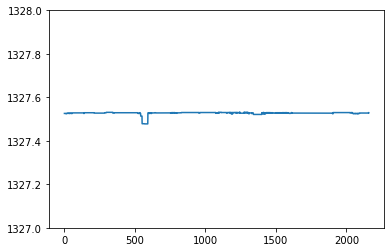

In [34]:
plt.plot(prediction.data)
plt.ylim(1327,1328)